# Project name :2022 Billionaires in the world
# Eilon Dadon , Shlomo Kleinman , Shmuel Horn , Giyora Adler

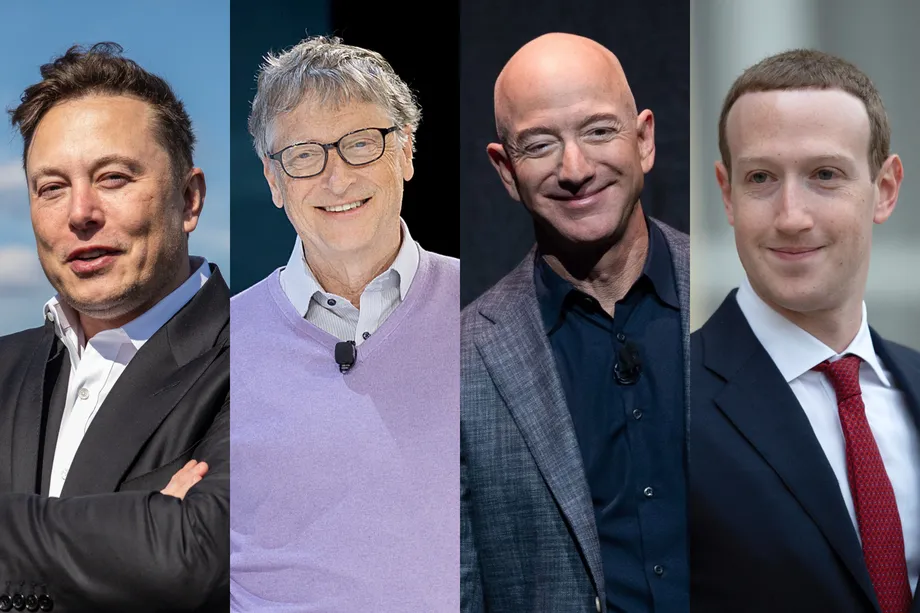

In [54]:
from IPython import display
display.Image('https://cdn.vox-cdn.com/thumbor/pBzCuxjg7BF4pez39BJ0wRM7h3E=/0x0:1800x1200/920x613/filters:focal(753x0:1041x288):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/69047461/headshots_1617069529743.0.jpg'
)

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


url='https://raw.githubusercontent.com/EilonDadon/Data-Science/main/project/forbes_2022_billionaires.csv'
df=pd.read_csv(url)
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


## Wrangling the data

In [56]:
df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

In [57]:
df.dtypes

rank                      int64
personName               object
age                     float64
finalWorth              float64
year                      int64
month                     int64
category                 object
source                   object
country                  object
state                    object
city                     object
countryOfCitizenship     object
organization             object
selfMade                   bool
gender                   object
birthDate                object
title                    object
philanthropyScore       float64
residenceMsa             object
numberOfSiblings        float64
bio                      object
about                    object
dtype: object

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

#### Let's take the interesting columns and make a new dataframe

In [59]:
billio_df = df[['personName','rank','age' , 'finalWorth','category','country','gender','philanthropyScore','selfMade']].copy()
billio_df.isnull().sum()

personName              0
rank                    0
age                    86
finalWorth              0
category                0
country                13
gender                 16
philanthropyScore    2272
selfMade                0
dtype: int64

In [60]:
billio_df.head()

,personName,rank,age,finalWorth,category,country,gender,philanthropyScore,selfMade
0,Elon Musk,1,50.0,219000.0,Automotive,United States,M,1.0,True
1,Jeff Bezos,2,58.0,171000.0,Technology,United States,M,1.0,True
2,Bernard Arnault & family,3,73.0,158000.0,Fashion & Retail,France,M,NaN,False
3,Bill Gates,4,66.0,129000.0,Technology,United States,M,4.0,True
4,Warren Buffett,5,91.0,118000.0,Finance & Investments,United States,M,5.0,True


In [61]:
billio_df.loc[billio_df['country'] == 'Israel'].value_counts().sum() #we have 23 israelies billioners in the list

0

#### we have 23 israelies on the list!

 #






#
#





#

<span style="font-family: Arial; font-size:3.0em;color:red;"> What age has the most billionairs?</p> 

### dropping NaNs

In [62]:
billio_df.isnull().sum()

personName              0
rank                    0
age                    86
finalWorth              0
category                0
country                13
gender                 16
philanthropyScore    2272
selfMade                0
dtype: int64

In [63]:
billio_df['age'].dropna(inplace = True)

##  Showing graph

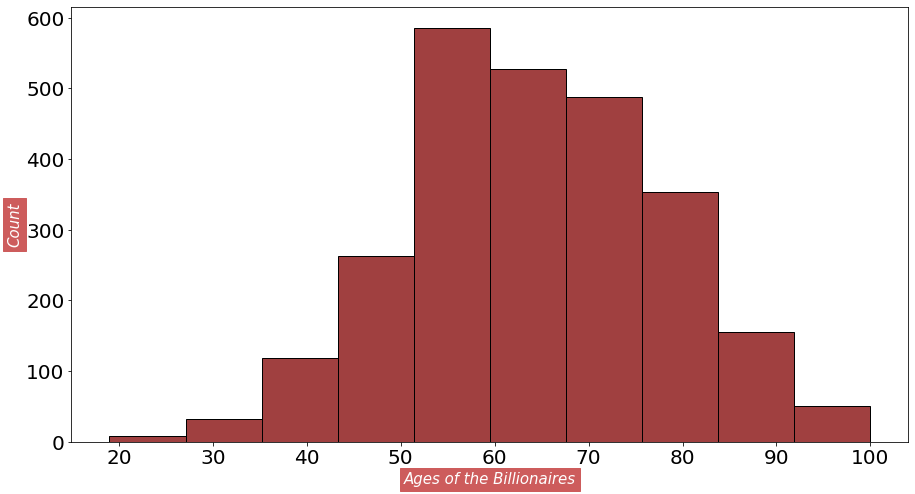

In [64]:
billio_df.sort_values('age' , ascending = True , inplace = True)
plt.figure(figsize = (15,8))
ax = sns.histplot(x = 'age' , data = billio_df ,color = 'maroon', bins = 10 , ec = 'black')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.set_xlabel('Ages of the Billionaires',fontsize = 15,color = 'white',fontstyle = 'italic' , backgroundcolor='indianred')
ax.set_ylabel('Count', fontsize = 15 ,rotation = 90 ,color = 'white',fontstyle = 'italic' , backgroundcolor='indianred' ) 
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **Around age of 60 we have the most rich people**
</p> 

 #






#
#





#

<span style="font-family: Arial; font-size:3.0em;color:red;"> Is there a difference between genders in category of career?</p> 

#### dataframe for each gender, counting categories

In [65]:
female=billio_df[billio_df.gender=='F']
female = female.groupby('category')[['finalWorth']].count()
female.sort_values('finalWorth',ascending = False,inplace = True)
female.reset_index(inplace = True)

In [66]:
male=billio_df[billio_df.gender=='M']
male = male.groupby('category')[['finalWorth']].count()
male.sort_values('finalWorth',ascending = False,inplace = True)
male.reset_index(inplace = True)

#### showing top 7 categories for each gender

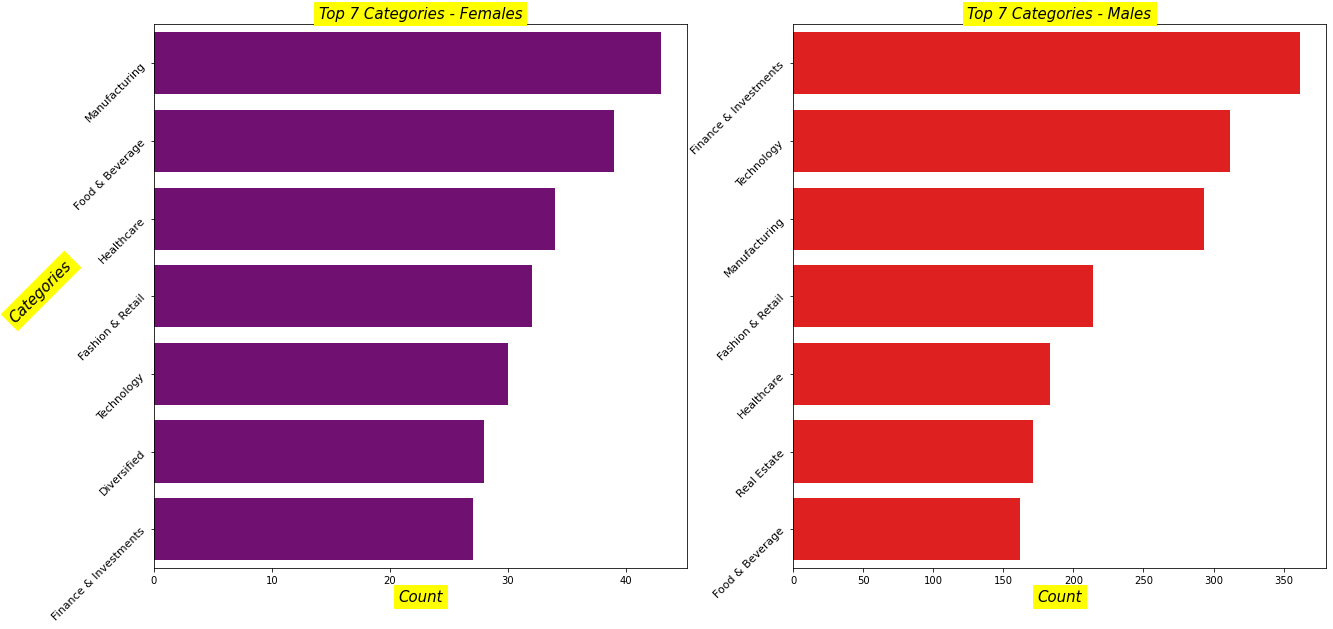

In [67]:
fig, axes = plt.subplots(figsize=(21,10), ncols=2)
female_plot = sns.barplot(data = female.head(7).sort_values('finalWorth' , ascending = False),x = 'finalWorth' ,y = 'category' , ax = axes[0],color = 'purple' )
male_plot = sns.barplot(data = male.head(7).sort_values('finalWorth' , ascending = False),x = 'finalWorth',y = 'category' , ax = axes[1], color = 'red')

male_plot.set_yticklabels(male_plot.get_yticklabels(),rotation = 45 , size = 11)
female_plot.set_yticklabels(female_plot.get_yticklabels(),rotation = 45 , size = 11)

male_plot.set_xlabel('Count',fontsize = 15,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center')
male_plot.set_ylabel(None) 

female_plot.set_xlabel('Count',fontsize = 15,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center')
female_plot.set_ylabel('Categories', fontsize = 15 ,rotation = 45 ,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' ) 

male_plot.set_title('Top 7 Categories - Males', fontsize = 15 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
female_plot.set_title('Top 7 Categories - Females', fontsize = 15 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')

plt.ticklabel_format(style='plain', axis='x')
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **Conclusion 1: We can see that there are big differences. for example, Finance & investment is 1st for males, 7th for females. food and beverage is 2nd for females, and 7th for males. Although, interesting to see that Fashion & Retail is 4th for both!**
</p> 

 #






#
#






#

### Let's look at data by countries
#### use groupby-agg to create a dataframe of countries with each attribute dealt with differently

In [68]:
countries_df=df.groupby('country').agg({'finalWorth': ['sum'],'age':['mean'], 'philanthropyScore': ['mean'],'selfMade': ['mean'], 'personName':['count']})
countries_df

,finalWorth,age,philanthropyScore,selfMade,personName
,sum,mean,mean,mean,count
country,,,,,
Algeria,5100.0,78.000000,NaN,1.000000,1
Andorra,1300.0,78.000000,NaN,0.000000,1
Argentina,16000.0,86.250000,NaN,0.666667,6
Australia,193500.0,65.575000,1.000000,0.707317,41
Austria,69500.0,63.833333,NaN,0.666667,12
...,...,...,...,...,...
United Arab Emirates,40000.0,61.375000,NaN,0.500000,10
United Kingdom,394800.0,62.682927,2.000000,0.752941,85


#### dropping level to avoid multi-index

In [69]:
countries_df.columns = countries_df.columns.droplevel(0)
countries_df.columns=['finalWorth','age','philanthropyScore','selfMade','amount_of_rich']
countries_df

,finalWorth,age,philanthropyScore,selfMade,amount_of_rich
country,,,,,
Algeria,5100.0,78.000000,NaN,1.000000,1
Andorra,1300.0,78.000000,NaN,0.000000,1
Argentina,16000.0,86.250000,NaN,0.666667,6
Australia,193500.0,65.575000,1.000000,0.707317,41
Austria,69500.0,63.833333,NaN,0.666667,12
...,...,...,...,...,...
United Arab Emirates,40000.0,61.375000,NaN,0.500000,10
United Kingdom,394800.0,62.682927,2.000000,0.752941,85
United States,4753500.0,65.967655,1.862245,0.735294,748


#### filter countries with less than 24 values, so that the mean is meaningful
##### why 24? because Israel has 24

In [70]:
countries_df=countries_df[countries_df['amount_of_rich']>23].copy()
countries_df

,finalWorth,age,philanthropyScore,selfMade,amount_of_rich
country,,,,,
Australia,193500.0,65.575000,1.000000,0.707317,41
Brazil,146500.0,65.301887,NaN,0.388889,54
Canada,175300.0,70.690476,NaN,0.711111,45
China,2145250.0,57.762340,NaN,0.968476,571
France,454600.0,69.000000,NaN,0.470588,34
Germany,498900.0,64.042553,NaN,0.321429,112
Hong Kong,335500.0,67.045455,NaN,0.661765,68
India,723000.0,68.361290,NaN,0.465409,159
Indonesia,103800.0,72.000000,NaN,0.666667,27


 #






#
#






#

<span style="font-family: Arial; font-size:3.0em;color:red;"> **Which country's rich people work for their money?** </p> 

#### using countries dataframe to get self made for each country

In [71]:
countries_df.sort_values('selfMade' , inplace = True)

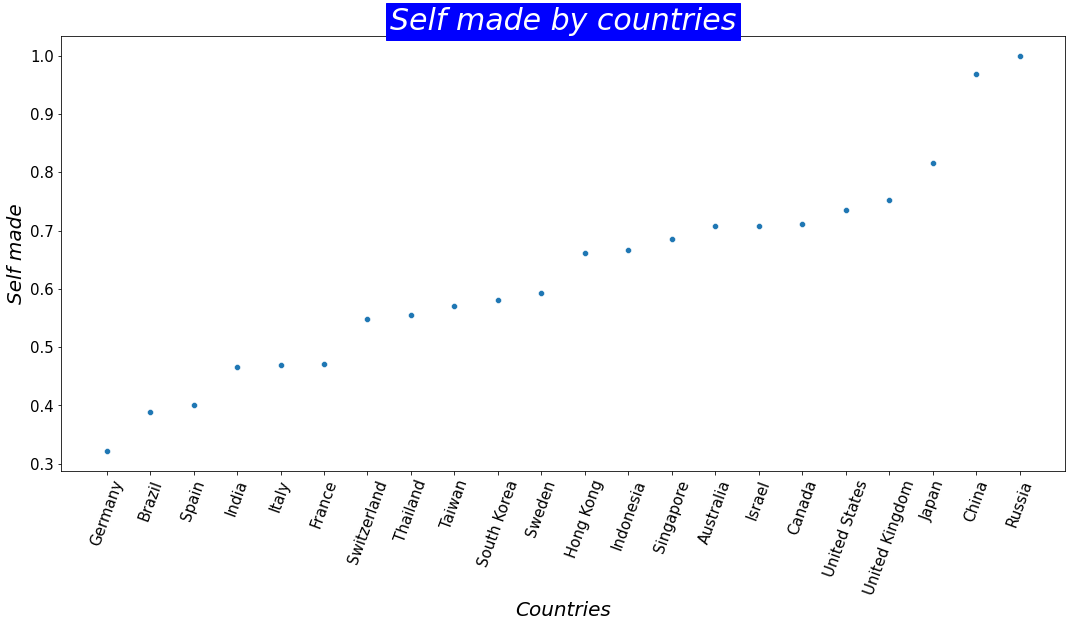

In [72]:
plt.figure(figsize=(18,8))
ax = sns.scatterplot(data=countries_df,x='country',y='selfMade')
plt.xticks(fontsize = 15,rotation=70)
plt.yticks(fontsize = 15)
ax.set_xlabel('Countries',fontsize=20 ,fontstyle = 'italic')
ax.set_ylabel('Self made',fontsize=20 ,fontstyle = 'italic')
plt.title('Self made by countries', fontsize = 30 , color = 'white',fontstyle = 'italic' , backgroundcolor='blue')
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **Conclusion 2: The russian people work the hardest , and german people the least. Israel is in the 7th place (Start-up nation)**
</p> 

 #






#
#






#

<span style="font-family: Arial; font-size:3.0em;color:red;"> If I am a fund-raiser , to where and to who should I go ask for money?</p>

## Let's start with 'where'?

#### using countries data frame to get final worth per country

In [73]:
country_rank = countries_df.finalWorth.reset_index()
country_rank.sort_values('finalWorth' ,ascending = False,inplace= True)
country_rank

,country,finalWorth
17,United States,4753500.0
20,China,2145250.0
3,India,723000.0
0,Germany,498900.0
5,France,454600.0
18,United Kingdom,394800.0
6,Switzerland,340600.0
11,Hong Kong,335500.0
21,Russia,243800.0
14,Australia,193500.0


### graph it

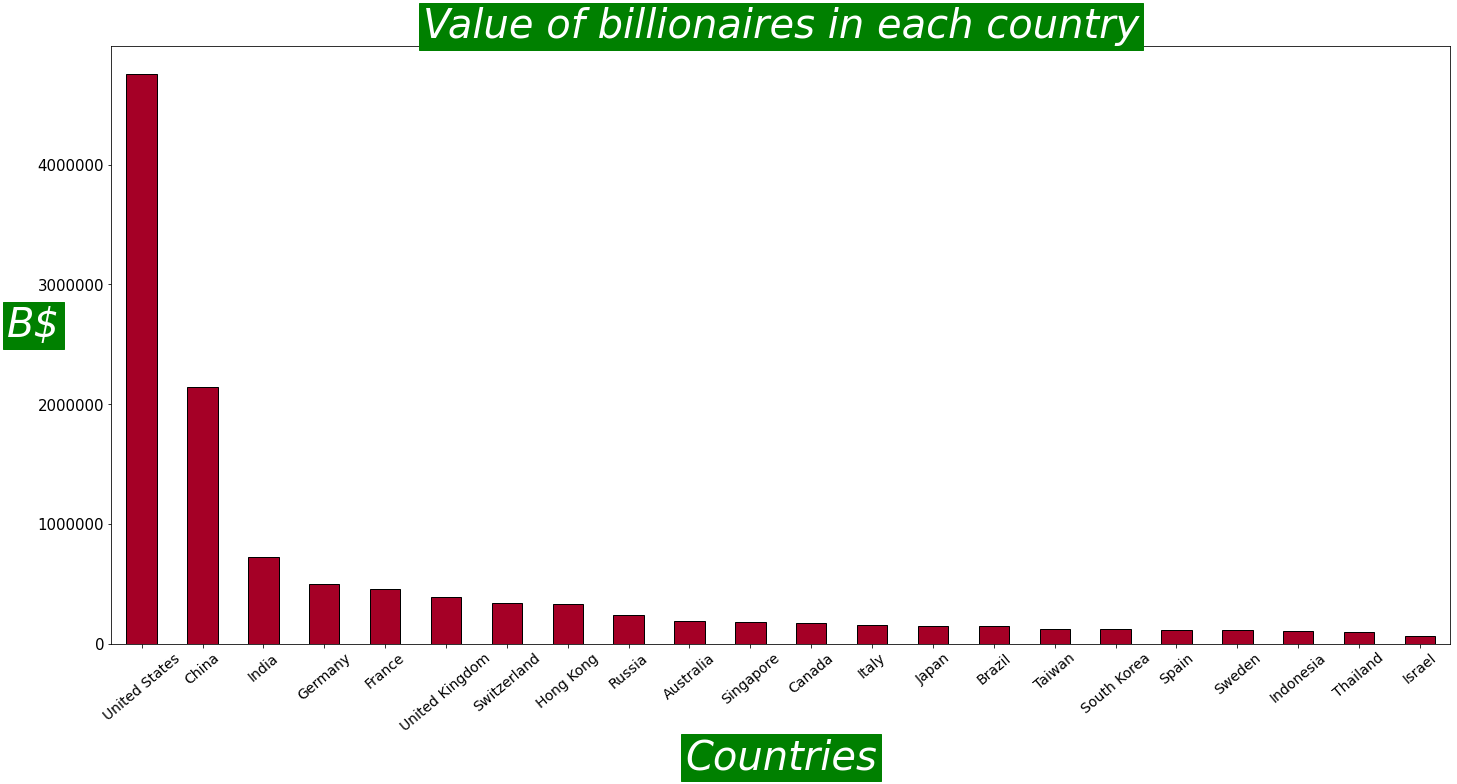

In [74]:
ax =country_rank.plot(kind = 'bar' , x = 'country' , y = 'finalWorth', figsize = (24,11),rot = 40, colormap = 'RdYlGn' , legend = False, edgecolor = 'black')
plt.title('Value of billionaires in each country', fontsize = 40 , color = 'white',fontstyle = 'italic' , backgroundcolor='green')
ax.set_xlabel('Countries',fontsize=40 ,color = 'white',fontstyle = 'italic' , backgroundcolor='green')
ax.set_ylabel('B$' , fontsize = 40, rotation = 0, color = 'white',fontstyle = 'italic' , backgroundcolor='green')
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14)
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **Looks like we should go to US, where the big money is**
</p> 

## Now, 'who'?

### Let's start with which age is the most philantropic

#### data frame with no nulls in philanthropyScore and age column, of billionairs in US

In [75]:
phil_df = df
phil_df['age'].dropna(inplace = True)
phil_df['philanthropyScore'].dropna(inplace = True)
phil_df = phil_df.loc[phil_df['country'] == 'United States'].reset_index(drop = True)
phil_df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
3,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."
4,6,Larry Page,49.0,111000.0,2022,4,Technology,Google,United States,California,...,Alphabet,True,M,1973-03-26,Entrepreneur,1.0,"San Jose, CA",NaN,"Larry Page stepped down as CEO of Alphabet, th...",Page has avoided public appearances since Sund...


#### show in boxplot

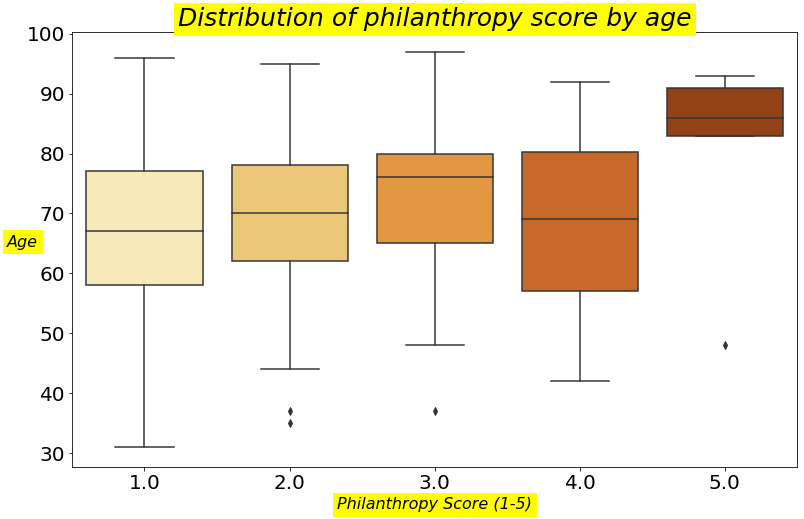

In [76]:
plt.figure(figsize = (13,8))
ax = sns.boxplot(data = phil_df , x = 'philanthropyScore' , y = 'age' , palette = 'YlOrBr')
ax.set_xlabel('Philanthropy Score (1-5)',fontsize = 16,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
ax.set_ylabel('Age', fontsize = 16 ,rotation = 0 ,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center' ) 
plt.title('Distribution of philanthropy score by age', fontsize = 25 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **First of all, we can see that it is best to go billionairs who are between 80 and a bit over 90**
</p> 

### Now, which category is most philantropic

#### dataframe of philanthropy score mean by category 

In [77]:
phil_grouped = phil_df.groupby('category')[['philanthropyScore']].mean()
phil_grouped.sort_values('philanthropyScore', inplace = True)
phil_grouped.reset_index(inplace = True)
phil_grouped.dropna(inplace = True)

#### show in graph

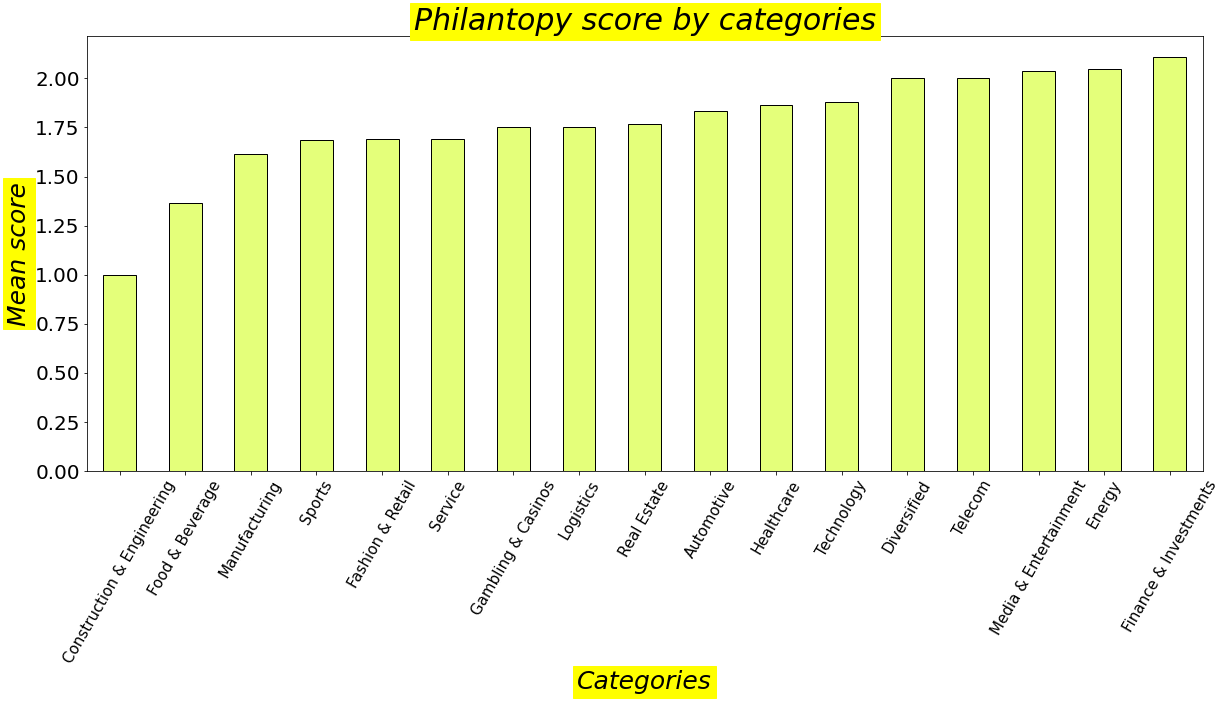

In [78]:
ax =phil_grouped.plot(kind = 'bar' , x = 'category' , y = 'philanthropyScore', figsize = (20,8),rot = 40, colormap = 'Wistia' , legend = False, edgecolor = 'black')
plt.title('Philantopy score by categories', fontsize = 30 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
ax.set_xlabel('Categories',fontsize=25 ,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
ax.set_ylabel('Mean score' , fontsize = 25, rotation = 90, color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center')
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 15 , rotation = 60)
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **Conclusions: if we want to fund-raise, we should fly to US, and  go to billionairs that are over 80 years old , and not in the construction & engineering field**
</p> 

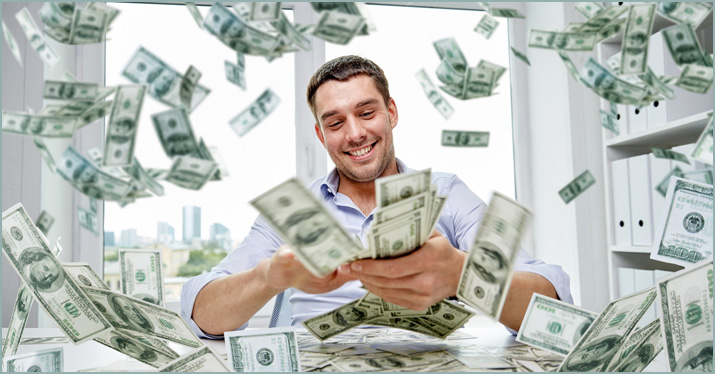

In [79]:
display.Image('https://blog.discmakers.com/wp-content/uploads/2017/06/Make-more-money-with-music-2.jpg')